In [1]:
#important libraries
#importing the necessary packages
import pandas as pd
import string
#import plotly.express as px
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import matplotlib.style

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.feature_selection import RFE
from scipy.stats import zscore
import statsmodels.formula.api as smf
from statsmodels.compat import lzip
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,log_loss,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


warnings.filterwarnings(action="ignore")
%matplotlib inline

In [2]:
patient_records=pd.read_csv('kaggle/Dataset.csv/Dataset.csv')
patient_records.head(10)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma
5,33181,74489,83,0,67.0,27.56,0,Caucasian,M,190.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic
6,82208,49526,83,0,59.0,57.45,0,Caucasian,F,165.1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
7,120995,50129,33,0,70.0,NaN,0,Caucasian,M,165.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Sepsis,Cardiovascular
8,80471,10577,118,1,45.0,NaN,0,Caucasian,M,170.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
9,42871,90749,118,0,50.0,25.71,0,NaN,M,175.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular


 == Start Machine Learning Testing ==

In [3]:
!pip install tensorflow

In [4]:
# Importing liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [6]:
patient_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [7]:
patient_records.shape

(91713, 186)

In [8]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [9]:
#checking missing values
patient_records.isnull().any().sum()

175

In [10]:
patient_records.isnull().sum().sort_values(ascending = True)

encounter_id            0
pre_icu_los_days        0
icu_type                0
icu_stay_type           0
icu_id                  0
                    ...  
h1_albumin_min      83824
h1_lactate_min      84369
h1_lactate_max      84369
h1_bilirubin_max    84619
h1_bilirubin_min    84619
Length: 186, dtype: int64

In [11]:
# statistical measures about the data
patient_records.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# checking the distribution of Target Varibale
patient_records['hospital_death'].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

In [13]:
patient_records.groupby('hospital_death').mean()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,,
0,65666.975501,65480.459629,105.693501,61.748741,29.264902,0.194873,169.706029,508.287716,0.787357,0.0,...,0.062882,0.024799,0.000818,0.014188,0.227215,0.011639,0.024012,0.006301,0.003763,0.018409
1,64961.356412,66137.129754,105.412634,68.494156,28.340398,0.065824,168.952094,509.098547,1.348287,0.0,...,0.334838,0.242726,0.001277,0.031673,0.203704,0.027331,0.049042,0.015198,0.008046,0.044317


In [17]:
import pandas as pd
import numpy as np

# 計算相關係數
corr_matrix = patient_records.corr()

# 從相關係數矩陣中找到所有與'hospital_death'相關係數絕對值最大的10個欄位
related_cols = corr_matrix['hospital_death'].abs().sort_values(ascending=False)[1:11]

print(related_cols)

d1_lactate_min                   0.403614
d1_lactate_max                   0.399029
h1_lactate_min                   0.344046
h1_lactate_max                   0.340951
apache_4a_hospital_death_prob    0.311043
apache_4a_icu_death_prob         0.283913
gcs_motor_apache                 0.282449
gcs_eyes_apache                  0.260373
gcs_verbal_apache                0.241044
d1_sysbp_invasive_min            0.234382
Name: hospital_death, dtype: float64


AttributeError: 'tuple' object has no attribute 'spines'

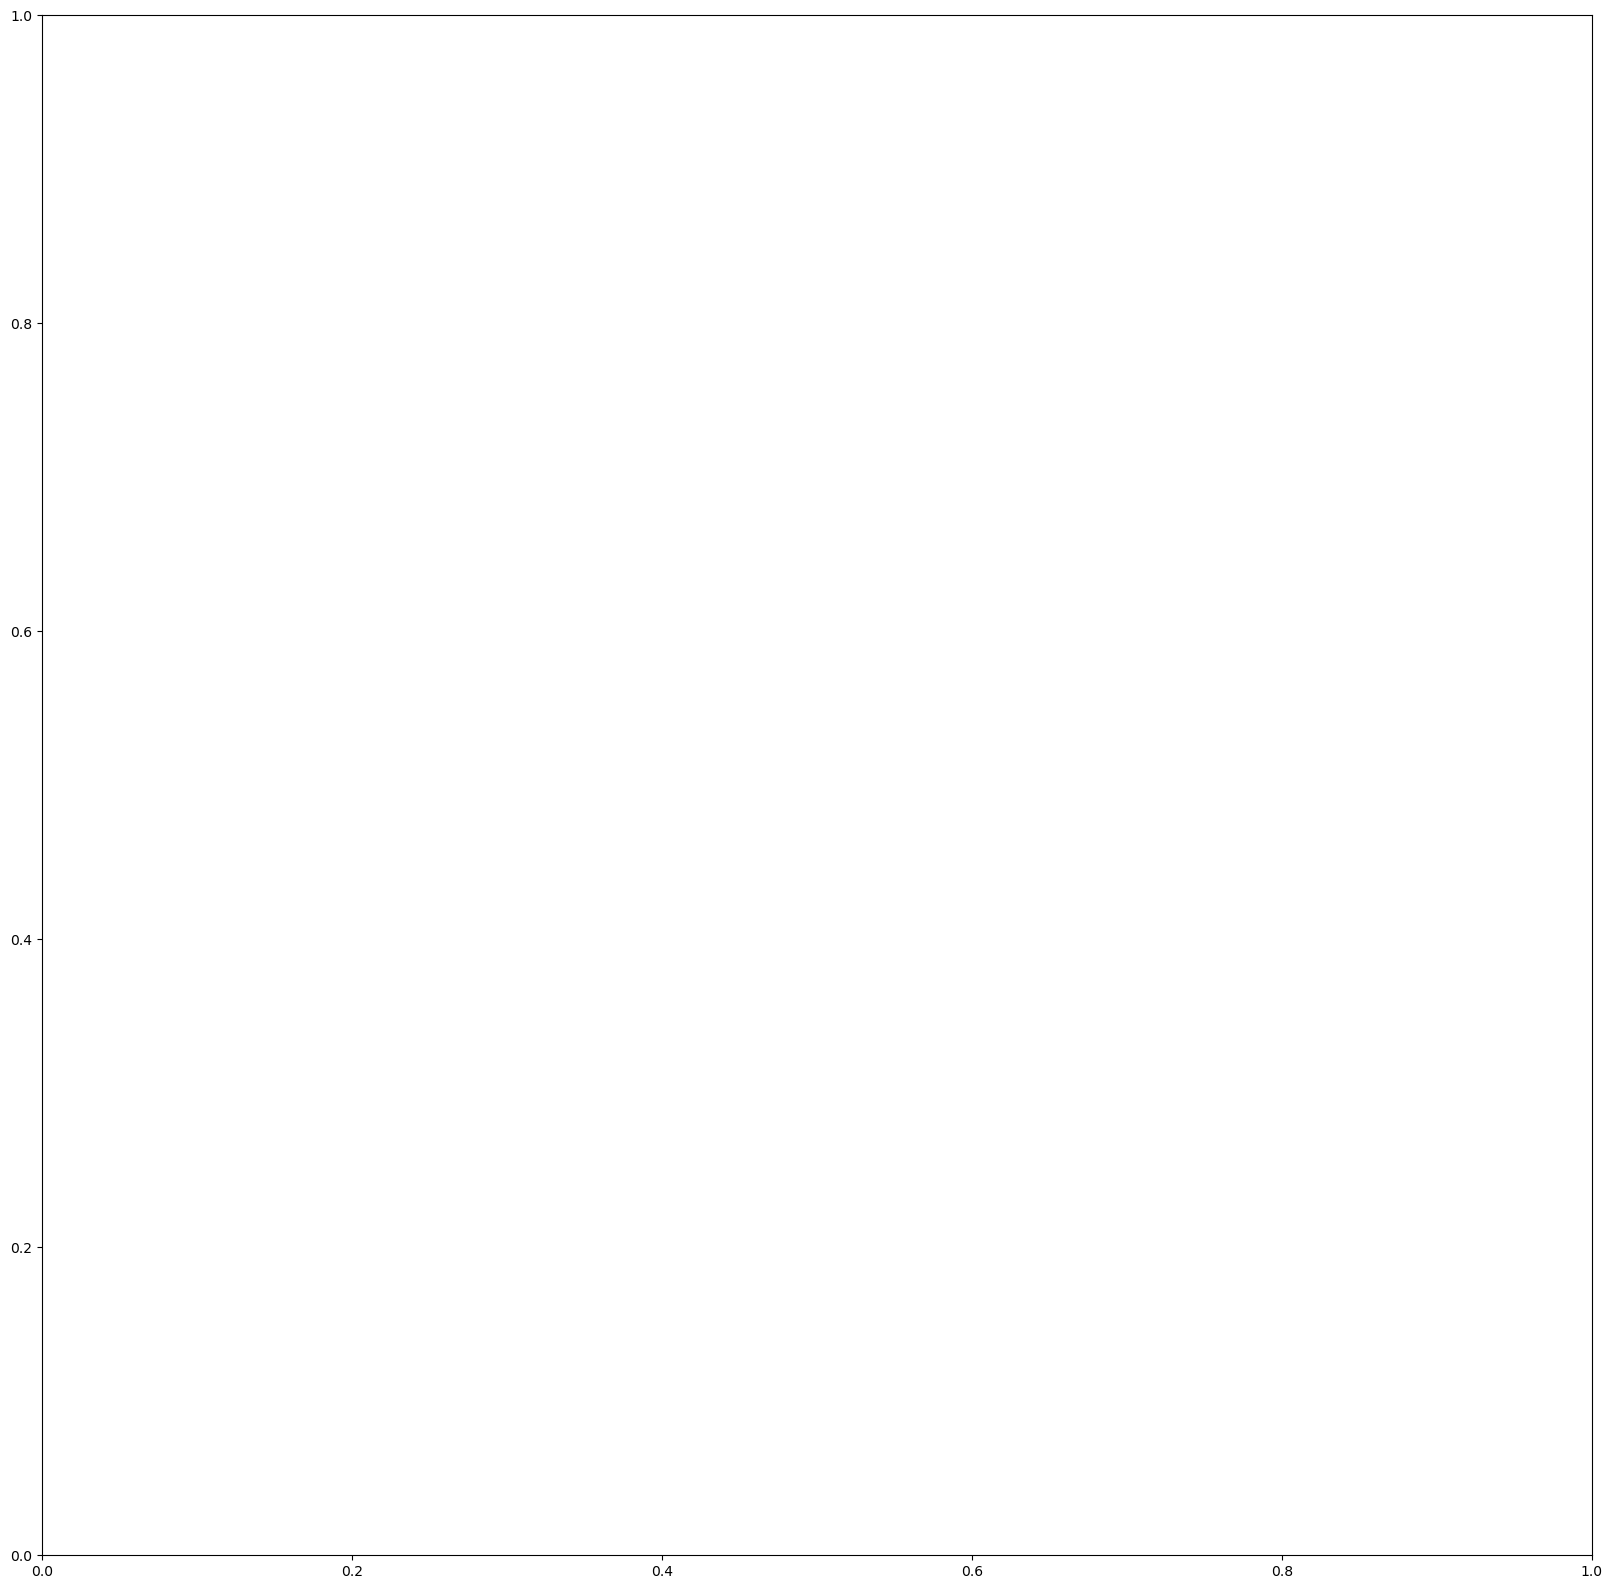

In [16]:
related_cols_20 = corr_matrix.nlargest(10, 'hospital_death')['hospital_death'].index

# 创建相关性子集
corr_subset = patient_records[related_cols_20].corr()

# 绘制相关性热力图  
sns.heatmap(corr_subset,annot=True,linewidth=3.5,ax=ax)

In [ ]:
import numpy as np
corr_matrix = np.corrcoef(patient_records['hospital_death'], patient_records['elective_surgery'])
corr_matrix

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='hospital_death',data=patient_records)

In [ ]:
object_columns = patient_records.select_dtypes(include=['object']).columns

In [ ]:
object_columns

In [ ]:
cols = patient_records.select_dtypes([np.number]).columns
cols

In [ ]:
### Checking Outliers
sns.distplot(patient_records['hospital_death']) 

In [ ]:
sns.distplot(patient_records['hepatic_failure']) 

In [ ]:
sns.distplot(patient_records['solid_tumor_with_metastasis']) 

In [ ]:
patient_records[cols] = patient_records[cols].fillna(patient_records[cols].mean())
patient_records[cols]

In [ ]:
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']
for i in object_columns:
    patient_records[i].fillna(patient_records[i].mode()[0], inplace=True)
    print(i)

In [ ]:
patient_records.isnull().sum()

In [ ]:
patient_records.isnull().any().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
object_columns = ['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type', 'apache_3j_bodysystem',
       'apache_2_bodysystem']

# Encode labels of multiple columns at once

patient_records[object_columns] = patient_records[object_columns].apply(le.fit_transform)

patient_records.head()

In [ ]:
patient_records.info()

In [ ]:
X = patient_records.drop(columns='hospital_death', axis=1)
Y = patient_records['hospital_death']

In [ ]:
X

In [ ]:
Y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
from xgboost import XGBClassifier

# 建立 XGBClassifier 模型 --KAY
xgboostModel = XGBClassifier(n_estimators=100, learning_rate= 0.3)
# 使用訓練資料訓練模型
xgboostModel.fit(X_train, Y_train)
# 使用訓練資料預測分類
predicted = xgboostModel.predict(X_train)

In [ ]:
print('訓練集: ',xgboostModel.score(X_train,Y_train))
print('測試集: ',xgboostModel.score(X_test,Y_test))

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
#Now we Will select the top six important features
sel_six_cols = SelectKBest(mutual_info_classif, k=6)
sel_six_cols.fit(X_train, Y_train)
X_train.columns[sel_six_cols.get_support()]

In [ ]:
X_train_new = sel_six_cols.transform(X_train)
X_test_new =  sel_six_cols.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_new)
X_test_std = scaler.transform(X_test_new)

In [ ]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
import tensorflow as tf
#Compile the model
model.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
    metrics = [
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train_std, Y_train, epochs=20, validation_split=0.2,batch_size=10)


In [ ]:
# evaluate the keras model
print(X_test_std.shape)
print(Y_test.shape)
print(X_test_std)
print(Y_test)
# generate confusion matrix scores

scores = model.evaluate(X_test_std, Y_test)  
predictions = (model.predict(X_train_std) > 0.5).astype("int32")
recall = model.evaluate(X_test_std, Y_test)
print (scores)
#predictions = model.predict_classes(X_train_std)

y_pred = model.predict(X_train_std)
y_pred = [0 if val < 0.5 else 1 for val in y_hat]
accuracy_score(y_test, y_pred)


#_, accuracy = model.evaluate(X_test_std, Y_test)
#recall= (model.predict
#print('Accuracy: %.2f' % (accuracy*100))
_,precision = model.evaluate(X_test_std, Y_test)
#print('Precision: %f' % precision)
_,recall = model.evaluate(X_test_std, Y_test)
#print('Recall: %f' % recall)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [ ]:
!pip3 install torch
!pip3 install torch torchvision torchaudio

In [ ]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [ ]:
#saving the model
model.save("keras_model.h5")
model_save_name = "keras_model.h5"

PATH = f"/content/gdrive/MyDrive/PolyU/COMP5152_Advanced_Data_Analytics/2022/COMP5152 Project/Patient Survival Prediction model/{model_save_name}"
model.save(PATH) 
print(model)
print(PATH)
#torch.save(model.state_dict(), PATH)

print(history)

In [ ]:
#loading the model 
from keras.models import load_model


#saving the model
#model.save('keras_model.h5')

model_save_name = 'keras_model.h5'
path = F"/content/gdrive/MyDrive/PolyU/COMP5152_Advanced_Data_Analytics/2022/COMP5152 Project/Patient Survival Prediction model/{model_save_name}" 
model = load_model(path)

In [ ]:
print(sorted(X_test['apache_3j_diagnosis'].unique()))

In [ ]:
print(sorted(X_test['gcs_motor_apache'].unique()))

In [ ]:
print(sorted(X_test['d1_lactate_max'].unique()))

In [ ]:
!pip install shap
import shap
shap.initjs()

In [ ]:
X_sample =pd.DataFrame( X_train_new,columns = X_train.columns[sel_six_cols.get_support()]).sample(100)

In [ ]:
X_sample

In [ ]:
explainer = shap.KernelExplainer(model.predict,X_train_new)

In [ ]:
shap_values = explainer.shap_values(X_sample)

In [ ]:
shap.summary_plot(shap_values, X_sample, plot_type="bar")

In [ ]:
###force plot
shap.force_plot(explainer.expected_value[0], shap_values[0], features = X_sample)

In [ ]:
shap.summary_plot(shap_values[0], features = X_sample)

patient_records = df

== End Machine Learning Testing ==

======Testing======

Reference.
https://colab.research.google.com/github/adelnehme/cleaning-data-in-python-live-training/blob/master/Cleaning_Data_in_Python_live_session.ipynb#scrollTo=W5vfZi03RwwY

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [ ]:
# Print the header of the DataFrame
patient_records.head()

In [ ]:
# Print data types of DataFrame
patient_records.dtypes

In [ ]:
#Print info of DataFrame
patient_records.info()

In [ ]:
# Print number of missing values
patient_records.isna().sum()

In [ ]:
# Print description of DataFrame
patient_records.describe()

In [ ]:
# Visualize the distribution of the rating column
sns.distplot(patient_records['apache_4a_hospital_death_prob'], bins = 20)
plt.title('Distribution of apache_4a_hospital_death_prob ratings')
plt.show()

In [ ]:
# Find number of unique values in age column

patient_records['age'].unique()


In [ ]:
# Find number of unique values in height column

patient_records['height'].unique()


In [ ]:
# Find number of unique values in bmi column
()
patient_records['bmi'].unique()

In [ ]:
# How many values of different age do we have?
patient_records['age'].value_counts()

In [ ]:
# How many values of different height do we have?
patient_records['height'].value_counts()

In [ ]:
# How many values of different bmi do we have?
patient_records['bmi'].value_counts()

clearning data

In [ ]:
# Reminder of the DataFrame
patient_records.head()

In [ ]:
# Visualize the missingness 
msno.matrix(patient_records)
plt.show()

In [ ]:
# Visualize the missingness on sorted values
msno.matrix(patient_records.sort_values(by = 'bmi'))
plt.show()

In [ ]:
# Missingness barplot
msno.bar(patient_records)

======Testing======

In [ ]:
#Exact all the column from dataset
patient_records.columns

In [ ]:
#let's get in to the data information with datatypes
patient_records.info(verbose=True, null_counts=True)

In [ ]:
#Let us check out the individual data types
patient_records.dtypes

In [ ]:
binary_variables = [
    "hospital_death", 
    "elective_surgery", 
    "readmission_status", 
    "apache_post_operative", 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]


In [ ]:
patient_records[binary_variables].info()

In [ ]:
patient_records[binary_variables].nunique()

In [ ]:
patient_records[binary_variables].isnull().sum() * 100 / patient_records[binary_variables].shape[0]

In [ ]:
to_convert_variables = [ 
    "arf_apache", 
    "gcs_unable_apache", 
    "intubated_apache", 
    "ventilated_apache", 
    "aids", 
    "cirrhosis", 
    "diabetes_mellitus", 
    "hepatic_failure", 
    "immunosuppression", 
    "leukemia", 
    "lymphoma", 
    "solid_tumor_with_metastasis"
]
# patient_records["arf_apache"] = patient_records["arf_apache"].fillna(patient_records["arf_apache"].mode())
for var in to_convert_variables:
    print(var)
    print(patient_records[var].mode())

In [ ]:
patient_records[to_convert_variables] = patient_records[to_convert_variables].fillna(0.0)

In [ ]:
patient_records[to_convert_variables].info()

In [ ]:
# patient_records["arf_apache"].astype(np.int64)
patient_records['arf_apache'] = patient_records['arf_apache'].apply(np.int64)
patient_records['gcs_unable_apache'] = patient_records['gcs_unable_apache'].apply(np.int64)
patient_records['intubated_apache'] = patient_records['intubated_apache'].apply(np.int64)
patient_records['ventilated_apache'] = patient_records['ventilated_apache'].apply(np.int64)
patient_records['aids'] = patient_records['aids'].apply(np.int64)
patient_records['cirrhosis'] = patient_records['cirrhosis'].apply(np.int64)
patient_records['diabetes_mellitus'] = patient_records['diabetes_mellitus'].apply(np.int64)
patient_records['hepatic_failure'] = patient_records['hepatic_failure'].apply(np.int64)
patient_records['immunosuppression'] = patient_records['immunosuppression'].apply(np.int64)
patient_records['leukemia'] = patient_records['leukemia'].apply(np.int64)
patient_records['lymphoma'] = patient_records['lymphoma'].apply(np.int64)
patient_records['solid_tumor_with_metastasis'] = patient_records['solid_tumor_with_metastasis'].apply(np.int64)
patient_records[binary_variables].info()

In [ ]:
patient_records.drop(["apache_post_operative"], axis=1, inplace=True)

In [ ]:
#as by default our target variable is a numerical data we will change our datatype to categorical 
patient_records['hospital_death']=patient_records['hospital_death'].astype('object')

In [ ]:
patient_catgeorical = patient_records.select_dtypes(object)

In [ ]:
patient_catgeorical.info()

In [ ]:
patient_catgeorical.nunique()

In [ ]:
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

In [ ]:
for var in ["gender", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(var)
    print(patient_records[var].mode())

In [ ]:
patient_records["gender"] = patient_records["gender"].fillna("M")
patient_records["apache_3j_bodysystem"] = patient_records["apache_3j_bodysystem"].fillna("Cardiovascular")
patient_records["apache_2_bodysystem"] = patient_records["apache_2_bodysystem"].fillna("Cardiovascular")
patient_records["ethnicity"] = patient_records["ethnicity"].fillna("Caucasian")
patient_records["hospital_admit_source"] = patient_records["hospital_admit_source"].fillna("Floor")
patient_records["icu_admit_source"] = patient_records["icu_admit_source"].fillna("Floor")

In [ ]:
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem","ethnicity","hospital_admit_source","icu_admit_source"]:
    print(patient_records[var].value_counts())

In [ ]:
patient_records.apache_2_bodysystem.replace({"Undefined diagnoses": "Undefined Diagnoses"}, inplace=True)
for var in ["gender", "icu_type", "apache_3j_bodysystem", "apache_2_bodysystem"]:
    print(patient_records[var].value_counts())

In [ ]:
patient_catgeorical = patient_records.select_dtypes(object)
patient_catgeorical.isnull().sum() * 100 / patient_catgeorical.shape[0]

In [ ]:
patient_records.shape

Discrete variables containing columns

In [ ]:
integer_variables = [
    "encounter_id", 
    "hospital_id", 
    "patient_id", 
    "icu_id", 
    "gcs_eyes_apache", 
    "gcs_motor_apache", 
    "gcs_verbal_apache", 
]

In [ ]:
patient_discrete = patient_records[integer_variables]

In [ ]:
patient_discrete.info()

In [ ]:
patient_discrete.nunique()

Missing Values

In [ ]:
patient_discrete.isnull().sum() * 100 / patient_discrete.shape[0]

In [ ]:
patient_discrete["gcs_motor_apache"].value_counts()

In [ ]:
patient_discrete["gcs_eyes_apache"].value_counts()

In [ ]:
patient_discrete["gcs_verbal_apache"].value_counts()

In [ ]:
patient_records.drop(["encounter_id", "hospital_id", "icu_id", "patient_id"], axis=1, inplace=True)

In [ ]:
for var in ['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']:
    print(var)
    print(patient_records[var].mode())

In [ ]:
patient_records["gcs_motor_apache"] = patient_records["gcs_motor_apache"].fillna(6)
patient_records["gcs_eyes_apache"] = patient_records["gcs_eyes_apache"].fillna(4)
patient_records["gcs_verbal_apache"] = patient_records["gcs_verbal_apache"].fillna(5)

In [ ]:
patient_records['gcs_motor_apache'] = patient_records['gcs_motor_apache'].apply(np.int64)
patient_records['gcs_eyes_apache'] = patient_records['gcs_eyes_apache'].apply(np.int64)
patient_records['gcs_verbal_apache'] = patient_records['gcs_verbal_apache'].apply(np.int64)

In [ ]:
patient_records[['gcs_motor_apache', 'gcs_eyes_apache', 'gcs_verbal_apache']].info()

In [ ]:
patient_records.shape

In [ ]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

In [ ]:
patient_continuous.info()

In [ ]:
hour_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("h1")]
len(hour_basis_readings)

In [ ]:
patient_continuous[hour_basis_readings].info()

In [ ]:
patient_continuous[hour_basis_readings].isnull().sum() * 100 / patient_continuous[hour_basis_readings].shape[0]

In [ ]:
day_basis_readings = [i for i in patient_continuous.columns.tolist() if i.startswith("d1")]
len(day_basis_readings)

In [ ]:
patient_continuous[day_basis_readings].info()

In [ ]:
patient_continuous[day_basis_readings].isnull().sum() * 100 / patient_continuous[day_basis_readings].shape[0]

In [ ]:
patient_records.drop(hour_basis_readings, axis=1, inplace=True)

In [ ]:
patient_records.drop(day_basis_readings, axis=1, inplace=True)

In [ ]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

In [ ]:
patient_continuous.info()

In [ ]:
patient_continuous.isnull().sum() * 100 / patient_continuous.shape[0]

In [ ]:
to_remove = ["albumin_apache", "bilirubin_apache", "fio2_apache", "paco2_apache", "paco2_for_ph_apache", "pao2_apache", "ph_apache", "urineoutput_apache"]
patient_records.drop(to_remove, axis=1, inplace=True)

In [ ]:
patient_records.drop("pre_icu_los_days", axis=1, inplace=True)

In [ ]:
patient_continuous = patient_records.select_dtypes(np.float64)
patient_continuous.head()

In [ ]:
patient_continuous.describe()

In [ ]:
patient_continuous.skew()

In [ ]:
len(patient_continuous.columns)

In [ ]:
patient_continuous.info()

In [ ]:
convert_median = ["age", "bmi", "weight", "apache_2_diagnosis", "apache_3j_diagnosis", "bun_apache", 
                  "creatinine_apache", "glucose_apache", "map_apache", "temp_apache", "wbc_apache", 
                  "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].median(), inplace=True)

In [ ]:
convert_median = ["height", "heart_rate_apache", "hematocrit_apache", "resprate_apache", "sodium_apache"]
for con in convert_median:
    print(con)
    mode = patient_records[con]
#     patient_records[con].map({np.nan: mode})
    patient_records[con].fillna(patient_records[con].mean(), inplace=True)

In [ ]:
patient_records.info()

In [ ]:
#Let's extract all the categorical and the numerical columns for the further Analysis
df_categorical=patient_records.select_dtypes(object)
df_categorical.head()

In [ ]:
df_numerical=patient_records.select_dtypes(include=np.number)
df_numerical.head()

In [ ]:
categorical_columns=df_categorical.columns
numerical_columns=df_numerical.columns

In [ ]:
print("The number of categorical columns is: ",len(categorical_columns))
print("The columns are:",list(categorical_columns))

In [ ]:
print("The number of numerical columns is: ",len(numerical_columns))
print("The columns are:",list(numerical_columns))

Data Pre Processing Exploratory Data Analysis :

In [ ]:
#Let's check the null values 
number_of_missing_values = patient_records.isna().sum().sort_values(ascending=False)          
percentage_of_missing_values = (patient_records.isna().sum()*100/patient_records.isna().count()).sort_values(ascending=False)   
missing_data = pd.concat([number_of_missing_values,percentage_of_missing_values], axis =0 , keys = ['Total', 'Percentage of Missing Values'])    
missing_data

In [ ]:
print("Number of rows with missing values:", patient_records.isnull().any(axis=1).sum())

In [ ]:
missing_values = patient_records.isna().sum().sort_values(ascending=False)
missing_values

OBSERVATION :

In [ ]:
patient_records.describe()

Summerize the categorical column percentages

In [ ]:
print('% Values in each categorical columns in the dataset')
for k in categorical_columns:
    print('\n% Values in columns : ',k)
    print((patient_records[k].value_counts()/len(patient_records[k])*100))

In [ ]:
df_categorical=['hospital_death', 'ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']

In [ ]:
print('univariate analysis of hospital_death')
print('-----------------------------------')
print(patient_records['hospital_death'].value_counts())
plt.rcParams['figure.figsize']=(12,6)
patient_records['hospital_death'].value_counts().plot(kind='pie',autopct='%1.2f%%',figsize=(8,10))
plt.show()

In [ ]:
print('univariate analysis of ethnicity')
print('-----------------------------------------')
print(patient_records['ethnicity'].value_counts())
plt.figure(figsize=(10,15))
patient_records['ethnicity'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of gender')
print('-----------------------------------------')
print(patient_records['gender'].value_counts())
plt.figure(figsize=(10,15))
patient_records['gender'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of hospital_admit_source')
print('-----------------------------------------')
print(patient_records['hospital_admit_source'].value_counts())
plt.figure(figsize=(10,10))
patient_records['hospital_admit_source'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
print('univariate analysis of icu_admit_source')
print('-----------------------------------------')
print(patient_records['icu_admit_source'].value_counts())
plt.figure(figsize=(10,15))
patient_records['icu_admit_source'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of icu_stay_type')
print('-----------------------------------------')
print(patient_records['icu_stay_type'].value_counts())
plt.figure(figsize=(15,10))
patient_records['icu_stay_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of icu_type')
print('-----------------------------------------')
print(patient_records['icu_type'].value_counts())
plt.figure(figsize=(10,15))
patient_records['icu_type'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of apache_3j_bodysystem')
print('-----------------------------------------')
print(patient_records['apache_3j_bodysystem'].value_counts())
plt.figure(figsize=(25,15))
patient_records['apache_3j_bodysystem'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
print('univariate analysis of apache_2_bodysystem')
print('-----------------------------------------')
print(patient_records['apache_2_bodysystem'].value_counts())
plt.figure(figsize=(25,15))
patient_records['apache_2_bodysystem'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

In [ ]:
patient_records['hospital_death'].value_counts(normalize=True)*100

In [ ]:
#Let's analyse our responsive variable 'hospital_death'
plt.figure(figsize=(12,8))
sns.countplot(patient_records['hospital_death'])
plt.text(x=1,y=patient_records['hospital_death'].value_counts()[1]+1,
        s='8.63%');
plt.text(x=0,y=patient_records['hospital_death'].value_counts()[0]+1,
        s='91.36%');

plt.title('Countplot for the Target Variable (hospital_death)',fontsize=16)
plt.xlabel('Target Variable',fontsize=14)
plt.ylabel('Count',fontsize=14)

get into the Bivariate Analysis:

In [ ]:
#starting with the pair plot
##sns.set_style('whitegrid')
##sns.pairplot(data=patient_records)

In [ ]:
##plt.figure(figsize=(50,30))
##sns.heatmap(patient_records.corr())

Categorical-Continuous Analysis

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='age',data=patient_records)
plt.title('Visualize the hospital_death and age column',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='height',data=patient_records)
plt.title('Visualize the hospital_death and height',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('height',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='bmi',data=patient_records)
plt.title('Visualize the hospital_death and bmi column',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='weight',data=patient_records)
plt.title('Visualize the hospital_death and weight',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='hospital_death',y='apache_2_diagnosis',data=patient_records)
plt.title('Visualize the hospital_death and apache_2_diagnosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_2_diagnosis',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='apache_3j_diagnosis',data=patient_records)
plt.title('Visualize the hospital_death and apache_3j_diagnosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_3j_diagnosis',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(x='hospital_death',y='arf_apache',data=patient_records)
plt.title('Visualize the hospital_death and arf_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('arf_apache',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)
plt.title('Visualize the hospital_death and bun_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bun_apache',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.violinplot(x='hospital_death',y='arf_apache',data=patient_records)
plt.title('Visualize the hospital_death and arf_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('arf_apache',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)
plt.title('Visualize the hospital_death and bun_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('bun_apache',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='glucose_apache',data=patient_records)
plt.title('Visualize the hospital_death and glucose_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('glucose_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='heart_rate_apache',data=patient_records)
plt.title('Visualize the hospital_death and heart_rate_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('heart_rate_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='hematocrit_apache',data=patient_records)
plt.title('Visualize the hospital_death and hematocrit_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('hematocrit_apache',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='gcs_eyes_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_eyes_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_eyes_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='gcs_motor_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_motor_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_motor_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='gcs_unable_apache',data=patient_records)
plt.title('Visualize the hospital_death and gcs_unable_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('gcs_unable_apache',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='aids',data=patient_records)
plt.title('Visualize the hospital_death and aids',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('aids',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='cirrhosis',data=patient_records)
plt.title('Visualize the hospital_death and cirrhosis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('cirrhosis',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='diabetes_mellitus',data=patient_records)
plt.title('Visualize the hospital_death and diabetes_mellitus',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('diabetes_mellitus',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='sodium_apache',data=patient_records)
plt.title('Visualize the hospital_death and sodium_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('sodium_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='temp_apache',data=patient_records)
plt.title('Visualize the hospital_death and temp_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('temp_apache',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='solid_tumor_with_metastasis',data=patient_records)
plt.title('Visualize the hospital_death and solid_tumor_with_metastasis',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('solid_tumor_with_metastasis',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.violinplot(x='hospital_death',y='wbc_apache',data=patient_records)
plt.title('Visualize the hospital_death and wbc_apache',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('wbc_apache',fontsize=14)

plt.subplot(1,3,2)
sns.violinplot(x='hospital_death',y='apache_4a_hospital_death_prob',data=patient_records)
plt.title('Visualize the hospital_death and apache_4a_hospital_death_prob',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_4a_hospital_death_prob',fontsize=14)

plt.subplot(1,3,3)
sns.violinplot(x='hospital_death',y='apache_4a_icu_death_prob',data=patient_records)
plt.title('Visualize the hospital_death and apache_4a_icu_death_prob',fontsize=16)
plt.xlabel('hospital_death',fontsize=14)
plt.ylabel('apache_4a_icu_death_prob',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='ethnicity',y='age',data=patient_records)
plt.title('Visualize the ethnicity and age column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('Age',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='ethnicity',y='height',data=patient_records)
plt.title('Visualize the ethnicity and height',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('height',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='ethnicity',y='bmi',data=patient_records)
plt.title('Visualize the ethnicity and bmi column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='ethnicity',y='weight',data=patient_records)
plt.title('Visualize the ethnicity and weight',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,2,1)
sns.boxplot(x='gender',y='heart_rate_apache',data=patient_records)
plt.title('Visualize the ethnicity and bmi column',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('bmi',fontsize=14)

plt.subplot(1,2,2)
sns.boxplot(x='gender',y='apache_3j_diagnosis',data=patient_records)
plt.title('Visualize the ethnicity and weight',fontsize=16)
plt.xlabel('ethnicity',fontsize=14)
plt.ylabel('weight',fontsize=14)

plt.show()

Categorical data

In [ ]:
pr_categorical = patient_records.select_dtypes(object)
pr_categorical.shape

In [ ]:
variables = pr_categorical.columns

patient_lists = [variables[i:i+1] for i in range(0, len(variables), 1)]
patient_lists

In [ ]:
fig, axes = plt.subplots(9, 1, figsize=(15, 30))
# fig.tight_layout()
fig.subplots_adjust(hspace=1.5)
for i_index, patient_list in enumerate(patient_lists):
    for j_index, variable in enumerate(patient_list):
#         patient_records[variable].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axes[i_index, j_index], subplots='true', radius=1.5, figsize=(50, 120))
        axes[i_index].set_xlabel(variable)
        axes[i_index].tick_params(axis='x', labelrotation=20)
        sns.countplot(data=patient_records, x=variable, ax=axes[i_index])
plt.show()


Observations
1. Hospital Death
a. The target variable hospital death has an imbalnaced proportion as there are more survivals than deaths.
2. Ethinicity
a. From the graph it is seen than more number of caucasions have been admitted. And the least admitted ones are native americans.
3. Gender
a. There isnt much of a difference between male and female patients.
4. Hospital Admit Source
a. Emergency Room and Floor are maximum.
5. ICU Admit Source
a. Similar to hospital admit source, emergency room is maximum.
6. ICU Stay Type
a. Admission is the most popular one in icu stay type.
7. ICU Type
a. Med-Surg type is maximum.
8. APACHE 3j Bodysystem & APACHE 2 Bodysystem
a. Almost all of them have significant number of cases except for gynaec and haemo

In [ ]:
pr_continuous = patient_records.select_dtypes(np.float)
pr_continuous.shape

In [ ]:
variables = pr_continuous.columns
patient_lists = [variables[i:i+3] for i in range(0, len(variables), 3)]
patient_lists

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 30))
# fig.tight_layout()
fig.subplots_adjust(hspace=1.5)
for i_index, patient_list in enumerate(patient_lists):
    for j_index, variable in enumerate(patient_list):
        ax = axes[i_index, j_index]
#         patient_records[variable].value_counts().plot(kind='pie',autopct='%1.2f%%', ax=axes[i_index, j_index], subplots='true', radius=1.5, figsize=(50, 120))
        ax.set_xlabel(variable)
#         ax.tick_params(axis='x', labelrotation=20)
        sns.distplot(patient_records[variable], ax=ax)
plt.show()

Observations
Electivce surgery
It is seen that most of the patients admitted were not scheduled for a surgery beforehand.
APACHE
From the graphs, we can determine which score was the highest in each reading.
Comorbidity
We can infer that most of the patients were not diagnosed with the above diseases. The additional diseases are: AIDS, Cirrhosis, Diabetes Melitus, Hepatic Failure, Immunosuppression, Leukimia, Lymphoma, Solid Tumor with Metastasis

In [ ]:
patient_yes = patient_records[patient_records['hospital_death']==1]

In [ ]:
patient_yes

In [ ]:
df1 = pd.crosstab(index = patient_yes["ethnicity"],columns="count")    
df2 = pd.crosstab(index = patient_yes["gender"],columns="count")  
df3 = pd.crosstab(index = patient_yes["hospital_admit_source"],columns="count") 
df4 = pd.crosstab(index = patient_yes["icu_admit_source"],columns="count")

plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])

In [ ]:
df5 = pd.crosstab(index = patient_yes["icu_stay_type"],columns="count")
df6 = pd.crosstab(index = patient_yes["icu_type"],columns="count")
df7 = pd.crosstab(index = patient_yes["apache_3j_bodysystem"],columns="count")
df8 = pd.crosstab(index = patient_yes["apache_2_bodysystem"],columns="count")

plt.figure(figsize=(35,15))
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(35,25))


df5.plot.bar(ax=axes[0,0])
df6.plot.bar(ax=axes[0,1])
df7.plot.bar(ax=axes[1,0])
df8.plot.bar(ax=axes[1,1])

Positive and Negative Target Analysis with attributes:

In [ ]:
def barPerc(df,xVar,ax):
    
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="ethnicity",hue='hospital_death',data=patient_records)
barPerc(patient_records,'ethnicity',ax)

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="gender",hue='hospital_death',data=patient_records)
barPerc(patient_records,'gender',ax)

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_admit_source",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_admit_source',ax)

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_stay_type",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_stay_type',ax)

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x="icu_type",hue='hospital_death',data=patient_records)
barPerc(patient_records,'icu_type',ax)

In [ ]:
plt.figure(figsize=(30,20))
ax=sns.countplot(x="apache_3j_bodysystem",hue='hospital_death',data=patient_records)
barPerc(patient_records,'apache_3j_bodysystem',ax)

In [ ]:
plt.figure(figsize=(30,20))
ax=sns.countplot(x="apache_2_bodysystem",hue='hospital_death',data=patient_records)
barPerc(patient_records,'apache_2_bodysystem',ax)

Categorical-Categorical Analysis :

In [ ]:
print('bivariate analysis of ethnicity and gender')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['gender']))
pd.crosstab(patient_records['ethnicity'],patient_records['gender']).plot(kind='bar')
plt.title('visualize ethnicity status of gender')
plt.xlabel('gender')
plt.ylabel('Count of gender according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and hospital_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['hospital_admit_source']))
pd.crosstab(patient_records['ethnicity'],patient_records['hospital_admit_source']).plot(kind='bar')
plt.title('visualize ethnicity status of hospital_admit_source')
plt.xlabel('hospital_admit_source')
plt.ylabel('Count of hospital_admit_source according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['icu_type']))
pd.crosstab(patient_records['ethnicity'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize ethnicity status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['ethnicity'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize ethnicity status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of ethnicity and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['ethnicity'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['ethnicity'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize ethnicity status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the ethnicity status')
plt.show()

In [ ]:
print('bivariate analysis of gender and hospital_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['hospital_admit_source']))
pd.crosstab(patient_records['gender'],patient_records['hospital_admit_source']).plot(kind='bar')
plt.title('visualize gender status of hospital_admit_source')
plt.xlabel('hospital_admit_source')
plt.ylabel('Count of hospital_admit_source according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of gender and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['gender'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize gender status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of gender and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['gender'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize gender status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of gender and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['icu_type']))
pd.crosstab(patient_records['gender'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize gender status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of gender and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['gender'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize gender status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of gender and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['gender'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['gender'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize gender status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the gender status')
plt.show()

In [ ]:
print('bivariate analysis of hospital_admit_source and icu_admit_source')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_admit_source']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_admit_source']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_admit_source')
plt.xlabel('icu_admit_source')
plt.ylabel('Count of icu_admit_source according to the hospital_admit_source status')
plt.show()

In [ ]:
print('bivariate analysis of hospital_admit_source and icu_stay_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_stay_type']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_stay_type']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_stay_type')
plt.xlabel('icu_stay_type')
plt.ylabel('Count of icu_stay_type according to the hospital_admit_source status')
plt.show()

In [ ]:
print('bivariate analysis of hospital_admit_source and icu_type')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_type']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['icu_type']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of icu_type')
plt.xlabel('icu_type')
plt.ylabel('Count of icu_type according to the hospital_admit_source status')
plt.show()

In [ ]:
print('bivariate analysis of hospital_admit_source and apache_3j_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_3j_bodysystem']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_3j_bodysystem']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of apache_3j_bodysystem')
plt.xlabel('apache_3j_bodysystem')
plt.ylabel('Count of apache_3j_bodysystem according to the hospital_admit_source status')
plt.show()

In [ ]:
print('bivariate analysis of hospital_admit_source and apache_2_bodysystem')
print('-----------------------------------------------')
print(pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_2_bodysystem']))
pd.crosstab(patient_records['hospital_admit_source'],patient_records['apache_2_bodysystem']).plot(kind='bar')
plt.title('visualize hospital_admit_source status of apache_2_bodysystem')
plt.xlabel('apache_2_bodysystem')
plt.ylabel('Count of apache_2_bodysystem according to the hospital_admit_source status')
plt.show()

In [ ]:
plt.figure(figsize=(35,15))

plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='age',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='glucose_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='heart_rate_apache',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='bmi',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='height',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='weight',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='gcs_eyes_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='gcs_motor_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='gcs_unable_apache',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='arf_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='bun_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='creatinine_apache',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='sodium_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='temp_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='wbc_apache',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='hematocrit_apache',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='intubated_apache',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='map_apache',data=patient_records)

plt.show()

In [ ]:
plt.subplot(1,3,1)
sns.boxplot(x='hospital_death',y='apache_4a_hospital_death_prob',data=patient_records)

plt.subplot(1,3,2)
sns.boxplot(x='hospital_death',y='apache_4a_icu_death_prob',data=patient_records)

plt.subplot(1,3,3)
sns.boxplot(x='hospital_death',y='gcs_verbal_apache',data=patient_records)

plt.show()

In [ ]:
sns.boxplot(data=patient_records, x="hospital_death", y="age")

In [ ]:
sns.boxplot(data=patient_records, x="hospital_death", y="bmi")

=====testing=====

In [ ]:
sns.boxplot(data=patient_records, x="bmi", y="age")

=====testing=====

In [ ]:
sns.boxplot(data=patient_records, x="hospital_death", y="heart_rate_apache")

In [ ]:
sns.boxplot(data=patient_records, x="hospital_admit_source", y="apache_4a_hospital_death_prob")
plt.xticks(rotation=90)

In [ ]:
sns.boxplot(data=patient_records, x="icu_admit_source", y="apache_4a_icu_death_prob")
plt.xticks(rotation=90)

Multivariate Analysis :

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='ethnicity',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(14,10))
sns.violinplot(x='gender',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='hospital_admit_source',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_admit_source',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_stay_type',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(14,10))
sns.boxplot(x='icu_type',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(30,30))
sns.boxplot(x='apache_3j_bodysystem',y='age',data=patient_records,hue='hospital_death')

In [ ]:
plt.figure(figsize=(20,20))
sns.boxplot(x='apache_2_bodysystem',y='age',data=patient_records,hue='hospital_death')

In [ ]:
patient_records.drop(['readmission_status'],axis=1,inplace=True)

In [ ]:
patient_records.info()

Outliers Detection And Treatment :

In [ ]:
df_numerical = patient_records.select_dtypes(include=np.number)

In [ ]:
print(df_numerical)

In [ ]:
df_numerical.skew()

In [ ]:
plt.figure(figsize=(25,30))
sns.heatmap(df_numerical.corr(),annot=True)

Graphical Representation of Outliers

In [ ]:
outlier_columns=[]

plt.figure(figsize=(30,20))
s=1
for p in pr_continuous:
    plt.subplot(6,3,s)
    sns.distplot(pr_continuous[p])  
    s+=1

Treatment of Outliers by Powertransform :

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt=PowerTransformer()

In [ ]:
patient_pwrtransformed_data_num=pd.DataFrame(pt.fit_transform(df_numerical),columns=df_numerical.columns)

In [ ]:
patient_pwrtransformed_data_num.head()

Encoding the categorical variables:

In [ ]:
df_categorical = patient_records.select_dtypes(object)
df_categorical=df_categorical.drop('hospital_death',axis=1)
Encode=pd.get_dummies(data=df_categorical,drop_first=True)

In [ ]:
print(df_categorical)

In [ ]:
Encode=pd.get_dummies(patient_records,columns = ['hospital_death'],drop_first=True)  

In [ ]:
patient_records['hospital_death']=patient_records['hospital_death'].astype(int)

Seperating the target variable and the dependent variables:

In [ ]:
# Dependent variables:
X=patient_pwrtransformed_data_num

# Target variable:
y=patient_records[['hospital_death']].reset_index(drop=True)

In [ ]:
y.info()

In [ ]:
Encode=pd.get_dummies(data=patient_records,drop_first=True)

# Concatenating the Encoded categorical attributes to the powertransformed numerical attributes:
X=pd.concat([pd.DataFrame(X),Encode],axis=1)

In [ ]:
#plot color scaled correlation matrix
plt.figure(figsize=(30,20))
corr=pr_continuous.corr()
corr.style.background_gradient(cmap='coolwarm')

Removing features involved in multicollinearity uisng Variance Inflation Factor:

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X =pr_continuous.iloc[:,:-1]
calc_vif(X)

In [ ]:
for i in range(len(X.columns)):
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['Features']=X.columns
    multi=vif[vif['VIF Factor']>10]
    if (multi.empty==False):
        df_numerical_sorted=multi.sort_values(by='VIF Factor',ascending=False)
    else:
        print(vif)
        break
    if (df_numerical_sorted.empty==False):
        X=X.drop(df_numerical_sorted['Features'].iloc[0],axis=1)
    else:
        print(vif)

In [ ]:
# Checking the shape of the dependent dataset
X.shape

Splitting the data into training and testing set in the ratio (80:20):

In [ ]:
rc=10    # Initialising the random state at 10.
X=sm.add_constant(X)        # Adding the constant.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=rc)

Predictive Modeling:
Logit model summary for full model:

In [ ]:
# using statsmodels:
logit_model=sm.Logit(y_train,X_train).fit()
logit_model.summary()

Statistical Analysis of the features:
Significant features affecting the model:

In [ ]:
# If the p value for Wald test statistic is less than 0.05, we are considering the feature to 
# be significant.

significant=logit_model.pvalues[logit_model.pvalues<0.05]
significant_features=pd.DataFrame(data=significant,columns=['p-value'])
significant_features.drop('const',axis=0)

The following dependent variables contribute significantly to the overall model performance:

weight
apache_2_diagnosis
bun_apache
heart_rate_apache
map_apache
resprate_apache
wbc_apache
apache_4a_hospital_death_prob
Log odds value for each feature:

In [ ]:
log_odds=round(logit_model.params,2)
log_odds_data=pd.DataFrame(log_odds,columns=['Log odds'])
log_odds_data.drop('const',axis=0)

Odds Value for each feature:

In [ ]:
odds=round(np.exp(logit_model.params),2)
odds_data=pd.DataFrame(odds,columns=['Odds value'])
odds_data.sort_values(by='Odds value',ascending=False).drop('const',axis=0)

Higher the odds value, greater is the relation of the feature with the target variable.

Model Evaluation : McFadden's R^2 value(Pseudo R^2)

In [ ]:
accuracy=logit_model.prsquared
print('Logit model accuracy : ',accuracy)

Model Performance:
Accuracy using Confusion Matrix:
Considering the probability threshold to be 0.5:

In [ ]:
# Initializing the probability threshold:
th=0.5
ypred_prob=logit_model.predict(X_test)
ypred=[0 if p<th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat=confusion_matrix(y_test,ypred)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix for Logit Model : ')
print('---------------------------------','\n')
print(confusion_mat)

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

Calculating optimal value threshold for full model using the Youden's index:

In [ ]:
# Computing the True Positive rate(TPR),False Positive rate(FPR) and probability threshold:
fpr, tpr, th= roc_curve(y_test, ypred_prob)

# Creating a Dataframe of the data:
youden= pd.DataFrame({'TPR': tpr,
                       'FPR': fpr,
                        'thres':th})

# Calculating the Younden's index:
youden['YI']= youden.TPR-youden.FPR
youden= youden.sort_values(by='YI',ascending=False).reset_index(drop=True)
print(youden.head(5))
print('-----------------------------------------','\n')
# or
print('Optimal threshold for probability: ',round(youden['YI'].max(),2))

Considering the Optimal probability threshold:

In [ ]:
# Initialising the optimal probability threshold:
opt_th=0.51
ypred_prob=logit_model.predict(X_test)
ypred_optimal=[0 if p<opt_th else 1 for p in ypred_prob]

# Computing the Confusion matrix:
confusion_mat_optimal=confusion_matrix(y_test,ypred_optimal)
tn = confusion_mat_optimal[0,0]
tp = confusion_mat_optimal[1,1]
fp = confusion_mat_optimal[0,1]
fn = confusion_mat_optimal[1,0]
print('Confusion Matrix from Logit Model : ')
print('------------------------------------','\n')
print(confusion_mat_optimal)

Graphical Representation of Confusion Matrix:

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat_optimal,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

Logit model accuracy from confusion matrix :

In [ ]:
# For probability threshold as 0.5:
logit_model_accuracy_test=accuracy_score(y_test,ypred)
print('Logit model accuracy for test data using confusion matrix : ',logit_model_accuracy_test)

In [ ]:
# For optimal probability threshold as 0.51:
logit_model_optimal_accuracy=accuracy_score(y_test,ypred_optimal)
print('Logit model accuracy using confusion matrix : ',logit_model_optimal_accuracy)

Logit model classification report:

In [ ]:
# Computing the classification report:

logit_classification=classification_report(y_test,ypred)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logit_classification)

1. Logistic Regression Model using Scikit-learn:

In [ ]:
# Logistic Regression Model using sklearn:
log_reg=LogisticRegression()
log_model=log_reg.fit(X_train,y_train)
ypred_lr_test=log_model.predict(X_test)
ypred_lr_train=log_model.predict(X_train)
ypred_lr_probability=log_model.predict_proba(X_test)[:,1]

1.a) Model Performance Evaluation:
1.a).1. Confusion Matrix for Logistic Regression Model:

In [ ]:
# Computing the Confusion matrix: 

confusion_mat=confusion_matrix(y_test,ypred_lr_test)
tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[0,1]
fn = confusion_mat[1,0]
print('Confusion Matrix form Logistic Regression Model : ')
print('------------------------------------------------','\n')
print(confusion_mat)

1.a).2. Graphical Representation of Confusion Matrix:

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

1.a).3. Sensitivity and Specificity:

In [ ]:
Sensitivity_Logistic=(tp/(tp+fn))
print('Sensitivity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Logistic)
print('\n')
Specificity_Logistic=(tn/(tn+fp))
print('Specificity of the Logistic Regression Model: ')
print('---------------------------------------------','\n')
print(Specificity_Logistic)

In [ ]:
print('The Accuracy score of the test data for Logistic Regression model : ')
print(accuracy_score(y_test,ypred_lr_test),'\n')
print('The Accuracy score of the train data for Logistic Regression model : ')
print(accuracy_score(y_train,ypred_lr_train))

In [ ]:
# Computing the classification report:

logistic_report=classification_report(y_test,ypred_lr_test)
print('Logit model classification report: ')
print('------------------------------------','\n')
print(logistic_report)

1.a).6. ROC Curve for Logistic Regression Model:

In [ ]:
fpr,tpr,th=roc_curve(y_test,ypred_lr_probability)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='green')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Logistic Regression Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

1.a).7. ROC AUC Score:

In [ ]:
print('The ROC AUC score of the Logistic Regression model: ')
print('--------------------------------------------------- ','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_lr_probability))

1.a).8. Cross Entropy:

In [ ]:
cross_entropy=log_loss(y_test,ypred_lr_test)
print('The Cross Entropy score of the Logistic Regression model ')
print('--------------------------------------------------- ','\n')
print('Cross Entropy : ',cross_entropy)

1.b) Inferences for Logistic Regression Model:
Cross Entropy for the Logistic Regression Model is 3.06
ROC AUC Score for the Logistic Regression Model is 73.32
The Model Accuracy for the Logistic Regression Model is coming out to be around 92%.
f1 weighted avg for the Logistic Regression Model is around 91%.
Specificity : 99.16%
Sensitivity : 40.07%
2. K-Nearest Neighbors Classification Model using Scikit-learn:

In [ ]:
# Classification Model using sklearn:
knn_algorithm=KNeighborsClassifier()
knn_model=knn_algorithm.fit(X_train,y_train)
ypred_knn_test=knn_model.predict(X_test)
ypred_knn_train=knn_model.predict(X_train)
ypred_probability_knn=knn_model.predict_proba(X_test)[:,1]

2.a) Model Performance Evaluation:
2.a).1. Confusion Matrix for K-Nearest Neighbors Model:

In [ ]:
# Computing the Confusion matrix:

knn_confusion_mat=confusion_matrix(y_test,ypred_knn_test)
tn = knn_confusion_mat[0,0]
tp = knn_confusion_mat[1,1]
fp = knn_confusion_mat[0,1]
fn = knn_confusion_mat[1,0]
print('Confusion Matrix for K-Nearest Neighbors Model : ')
print('------------------------------------------------','\n')
print(knn_confusion_mat)

2.a).2. Graphical Representation of Confusion Matrix:

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(knn_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

2.a).3. Sensitivity and Specificity:

In [ ]:
Sensitivity_KNN=(tp/(tp+fn))
print('Sensitivity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_KNN)
print('\n')
Specificity_KNN=(tn/(tn+fp))
print('Specificity of the KNN Model: ')
print('---------------------------------------------','\n')
print(Specificity_KNN)

2.a).4. Accuracy Analysis

In [ ]:
print('The Accuracy score of the test data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_test,ypred_knn_test),'\n')
print('The Accuracy score of the train data for K-Nearest Neighbors Model : ')
print(accuracy_score(y_train,ypred_knn_train))

2.a).5. K-Nearest Neighbors Model classification report:

In [ ]:
# Computing the classification report:

knn_report=classification_report(y_test,ypred_knn_test)
print('K-Nearest Neighbors Model classification report: ')
print('------------------------------------------------','\n')
print(knn_report)

2.a).6. ROC Curve for K-Nearest Neighbors Model:¶

In [ ]:
fpr,tpr,th=roc_curve(y_test,ypred_probability_knn)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='blue')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for K-Nearest Neighbors Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

2.a).7. ROC AUC Score:¶

In [ ]:
print('The ROC AUC score of the K-Nearest Neighbors Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,ypred_probability_knn))

2.a).8. Cross Entropy:

In [ ]:
cross_entropy=log_loss(y_test,ypred_knn_test)
print('The Cross Entropy score of K-Nearest Neighbors Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

2.b) Inferences for K-Nearest Neighbors Classification Model:
Cross Entropy for K-Nearest Neighbors Model is 3.13
ROC AUC Score for the K-Nearest Neighbors Model is 65.92
The Model Accuracy for the K-Nearest Neighbors Model is coming out to be around 91%.
f1 weighted avg for the K-Nearest Neighbors Model is around 91%.
Specificity : 98%
Sensitivity : 34.19%


3. Decision Tree Classification Model using Scikit-learn:

In [ ]:
# Classification Model using sklearn:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_test_dt=dt.predict(X_test)
y_pred_train_dt=dt.predict(X_train)
y_test_prob_dt=dt.predict_proba(X_test)[:,1]

3.a) Model Performance Evaluation:
3.a).1. Confusion Matrix for Decision Tree classification:¶

In [ ]:
# Computing the Confusion matrix:

dt_confusion_mat=confusion_matrix(y_test,y_pred_test_dt)
tn = dt_confusion_mat[0,0]
tp = dt_confusion_mat[1,1]
fp = dt_confusion_mat[0,1]
fn = dt_confusion_mat[1,0]
print('Confusion Matrix for Decision Tree Model : ')
print('------------------------------------------------','\n')
print(dt_confusion_mat)

3.a).2. Graphical Representation of Confusion Matrix:

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(dt_confusion_mat,annot=True,linewidth=3.5,linecolor='blue')
plt.show()

3.a).3. Sensitivity and Specificity:


In [ ]:
Sensitivity_Decision_tree=(tp/(tp+fn))
print('Sensitivity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Sensitivity_Decision_tree)
print('\n')
Specificity_Decision_tree=(tn/(tn+fp))
print('Specificity of the Decision Tree Model: ')
print('---------------------------------------------','\n')
print(Specificity_Decision_tree)

3.a).4. Accuracy Analysis:

In [ ]:
print('The Accuracy score of test data for the Decision Tree Model: ')
print(accuracy_score(y_test,y_pred_test_dt),'\n')
print('The Accuracy score of the train data for the Decision Tree Model: ')
print(accuracy_score(y_train,y_pred_train_dt))

3.a).5. Decision Tree Model classification report:

In [ ]:
# Computing the classification report:

dt_report=classification_report(y_test,y_pred_test_dt)
print('Decision Tree Model classification report: ')
print('-----------------------------------------','\n')
print(dt_report)

3.a).6. ROC Curve for Decision Tree Model:

In [ ]:
fpr,tpr,th=roc_curve(y_test,y_test_prob_dt)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,color='grey')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
plt.title('ROC curve for Decision Tree Model')
plt.grid()
plt.plot([-0.05,1.05],[-0.05,1.05],'r--',linewidth=2)
plt.show()

3.a).7. ROC AUC Score:

In [ ]:
print('The ROC AUC score of the Decision Tree Model ')
print('--------------------------------------------------','\n')
print('ROC AUC : ',roc_auc_score(y_test,y_test_prob_dt))

3.a).7. Cross Entropy:

In [ ]:
cross_entropy=log_loss(y_test,y_pred_test_dt)
print('The Cross Entropy score of Decision Tree Model ')
print('----------------------------------------------------','\n')
print('Cross Entropy : ',cross_entropy)

3.b) Inferences for Decision Tree Classification Model:
The Cross entropy for the Decision Tree model is 4.31
ROC AUC Score for the Decision Tree Model is 63.26
The Model Accuracy for the Decision Tree Model is coming out to be around 87%.
f1 weighted avg for the Decision Tree Model is around 88%.
Specificity : 92.41%
Sensitivity : 34.19%

Tabular representation of derived Inferences:
Model Comparison:

In [ ]:
# Initializing the structure of the table:

columns=['Overall Accuracy Score','Accuracy for train data','Accuracy for test data','Specificity',
         'Sensitivity','f1 score weighted avg','ROC AUC Score','Cross Entropy']
indexes=['Logistic Regresion Model','K-Nearest Neighbors Model','Descision Tree Model']

In [ ]:
# Creating a Dataframe for compariosn of Models:
model_data=pd.DataFrame(columns=columns,index=indexes)

# Inserting observed readings to the data fields:
model_data['Overall Accuracy Score']=['91%','91%','88%']
model_data['Accuracy for train data']=['91.29%','92.23%','99.95%']
model_data['Accuracy for test data']=['90.91%','90.91%','87.50%']
model_data['Specificity']=['99.16%','98.53%','92.41%']
model_data['Sensitivity']=['40.07%','34.19%','34.19%']
model_data['f1 score weighted avg']=['88%','88%','88%']
model_data['ROC AUC Score']=[73.32,65.92,63.26]
model_data['Cross Entropy']=[3.06,3.13,4.31]
model_data

Inferences based on model comparison:
1. Overall Accuracy Score:

1. Logistic Regression Model has the highest overall accuracy of about 91%.

2. Decision Tree Model yeilds the lowest overall model accuracy of about 88%.

2. Overfitting/Underfitting:

1. All the classification models exhibit overfitting of the trained data with respect to the test data.

2. The model accuracy for train data and test data for both Logistic Regression Model and K-Nearest Neighbors Model has very less overfitting.

3. As observed,the model accuracy for train data and test data for the      Decision Tree Model has a considerably high difference in accuracies which can be considered a high overfitting condition in comparison to other models.

3. f1 score weighted avg:
1. The Logistic Regression Model has the highest weighted harmonic mean between precison and recall of about 88% based on the classification report.

2. Both K-Nearest Neighbors Model and Descision Tree Model have nearly similar weighted harmonic mean between precison and recall of about 88%.

3. We can further look at the recall values of the positive class and negative class to get more insights on the specificity and sensitivity.

4. Sensitivity and Specificity:
1. Logistic Regression Model :
  * Specificity = 99.16%
  * Sensitivity = 40.07% 

2. K-Nearest Neigbors Model :
  * Specificity = 98.53%
  * Sensitivity = 34.19% 

3. Decision Tree Model :
  * Specificity = 92.41%
  * Sensitivity = 34.19% 

5. ROC AUC Score:
1. The Logistic Regression Model has the maximum area under the ROC curve with a ROC AUC Score of 73.32.

2. The Decision Tree Model has the minimum area under the ROC curve with a ROC AUC Score of 63.26.

6. Cross Entropy:
1. Minimum Cross Entropy score for Logistic Regression model : 
H_logistic(y) = 3.06

2. Maximum Cross Entropy score for Decision Tree Model : 
H_Decisiontree(y) = 4.31